# Dolan Creek Watershed: One Watershed Water Balance - PRISM Grid

Process the PRISM grid to get area-weighted time series.

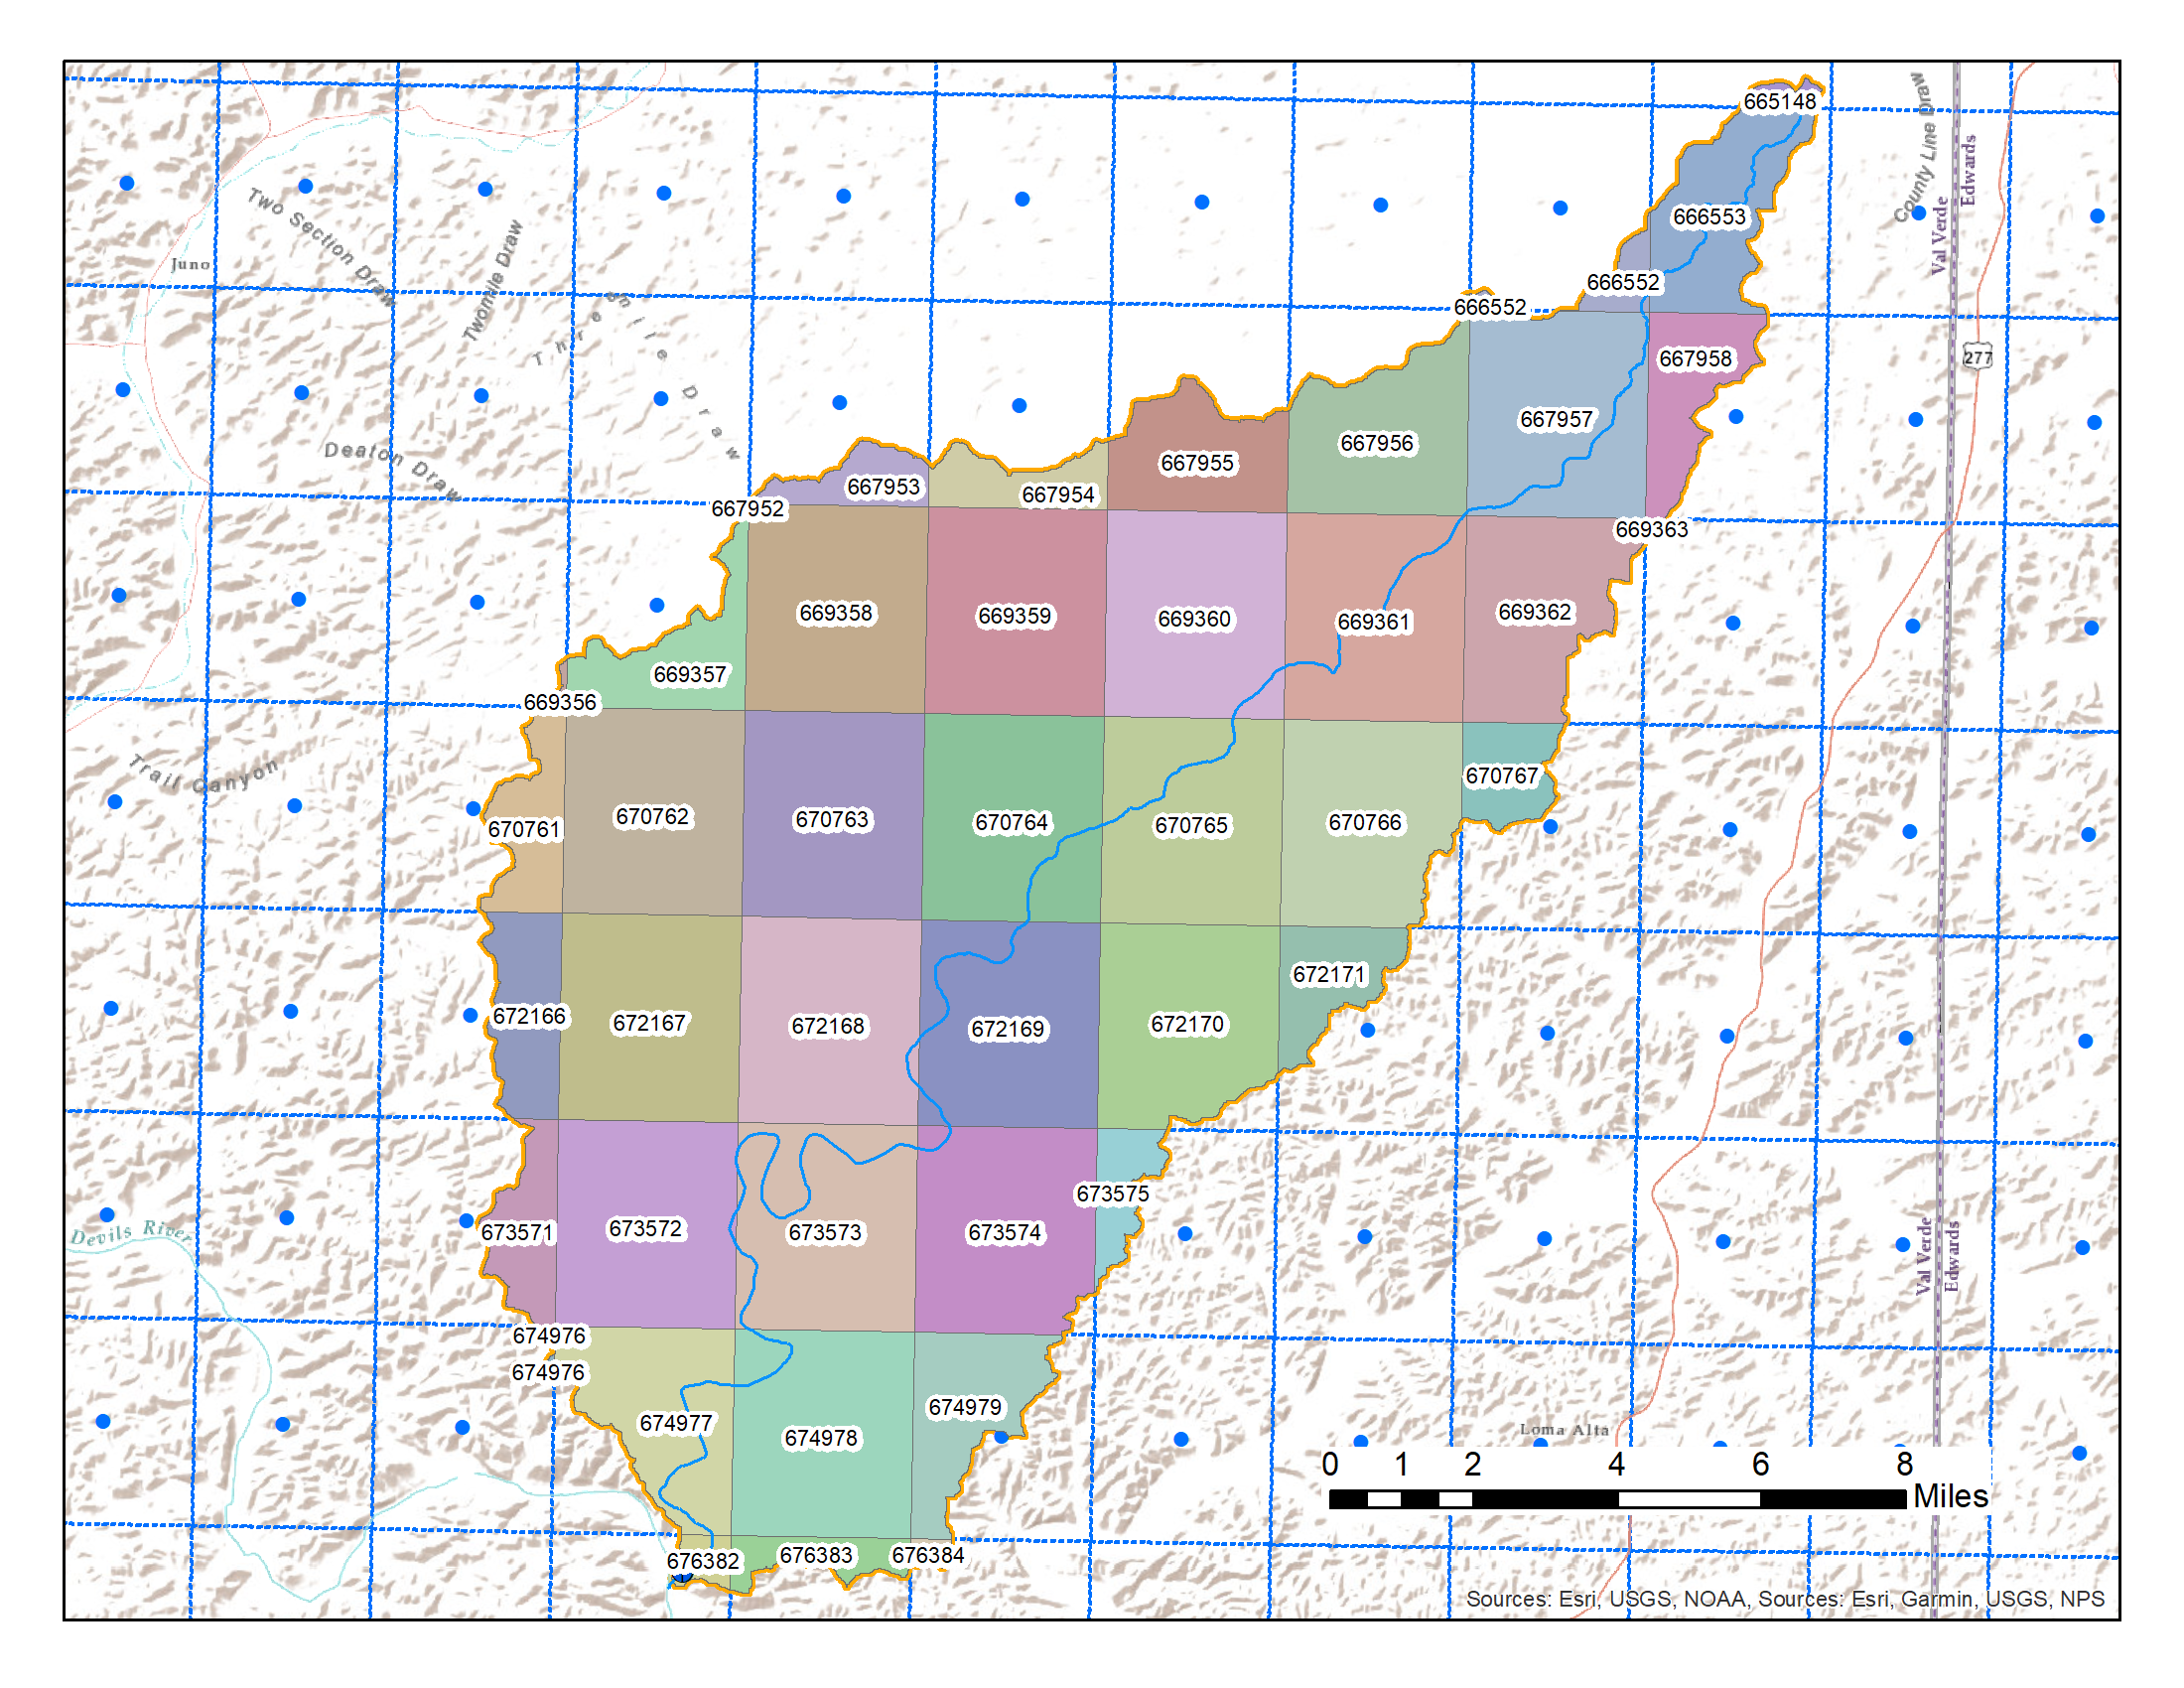

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
Image(filename = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stoch' \
                 r'astic_CC_Recharge\GIS\Images\PNG\PRISM_Climate_Grid-Areas.png', width=800)

In [2]:
%matplotlib inline

In [3]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as sstats
from math import exp

In [4]:
DC_WS_MI2 = 177.96
DC_WS_ACRE = 113896.0
DC_WS_M2 = 460920625.0

In [5]:
PPT_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
           r'charge\Data\Weather\PRISM_Daily\PRISM_AOI_Pts_ppt-Processed.xlsx'
TMIN_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
          r'charge\Data\Weather\PRISM_Daily\PRISM_AOI_Pts_tmin-Processed.xlsx'
TMAX_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
          r'charge\Data\Weather\PRISM_Daily\PRISM_AOI_Pts_tmax.xlsx'
TAVE_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
          r'charge\Data\Weather\PRISM_Daily\PRISM_AOI_Pts_tmean.xlsx'
TDPT_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
          r'charge\Data\Weather\PRISM_Daily\PRISM_AOI_Pts_tdmean.xlsx'
PRISM_SHT = "Daily"
PRISM_AREAS = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
              r'charge\GIS\Tables\One_WS\PRISM_Grid_Areas.xlsx'
PA_SHT = "Areas"

Relative humidity calculation

In [6]:
A1 = 17.625
B1 = 243.04
CRelHum2 = lambda Td, Ta: ( 100.0 * exp( ( (A1*(Td/B1))-((Td/B1)*((A1*Ta)/(B1+Ta)))-
                                           ((A1*Ta)/(B1+Ta)) ) /
                                           ( 1.0 + (Td/B1) ) ) )

In [7]:
OUT_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\Weather\One_WS'

## Load the Areas

In [8]:
PAreaDF = pd.read_excel( PRISM_AREAS, sheet_name=PA_SHT, header=0, index_col=0 )

In [9]:
display( HTML( PAreaDF.head().to_html() ) )

,Shape_Area_m2,New_Area_m2,POLY_AREA_m2,PERIMETER_m,CENTROID_X,CENTROID_Y
Index1,,,,,,
669360,3.529765e+09,1.855380e+07,1.855380e+07,17271.667455,319295.704054,3.329502e+06
669358,3.529765e+09,1.855516e+07,1.855516e+07,17272.299894,311262.868023,3.329637e+06
669357,3.529765e+09,1.855586e+07,7.568360e+06,19864.470642,307695.064779,3.328580e+06
669359,3.529765e+09,1.855447e+07,1.855447e+07,17271.980234,315279.310515,3.329569e+06
667954,3.529765e+09,1.854679e+07,4.355629e+06,12907.013802,315356.058999,3.332446e+06


In [10]:
GridIds = sorted( PAreaDF.index.unique() )
len( GridIds ), len(PAreaDF)

(44, 44)

In [11]:
Total_Area_m2 = PAreaDF['POLY_AREA_m2'].sum()
Total_Area_m2

460920625.00018346

In [12]:
PAreaDF["MultiP"] = PAreaDF['POLY_AREA_m2'] / Total_Area_m2 
PAreaDF["MultiP"].sum()

1.0000000000000002

In [13]:
MPList = list( PAreaDF["MultiP"].to_numpy() )

In [14]:
MPDict = dict( zip( GridIds, MPList ) )

In [15]:
# make a function to calculate the weighted value
def MakeAreaWeightValue( GridIds, WDict, row ):
    """Function to calculate the area weighted value from a dictionary of weights
    
    Args:
        GridIds (list): list containing the keys for the dictionary
        WDict (dict): keys= column names, values = weight (weights should sum to 1.0)
        row (pd.row): row from a data frame
        
    Returns:
        Weighted value
    """
    retVal = 0.0
    for gG in GridIds:
        cVal = float( row[gG] )
        wVal = WDict[gG]
        retVal += ( cVal * wVal )
    # end for
    return retVal

## Load Precipitation

In [16]:
PptDF = pd.read_excel( PPT_IN, sheet_name=PRISM_SHT, header=0, index_col=0, parse_dates=True )

In [17]:
display( HTML( PptDF.head().to_html() ) )

,662328,662329,662330,662331,662332,662333,662334,662335,662336,662337,662338,662339,662340,662341,662342,663733,663734,663735,663736,663737,663738,663739,663740,663741,663742,663743,663744,663745,663746,663747,665138,665139,665140,665141,665142,665143,665144,665145,665146,665147,665148,665149,665150,665151,665152,666543,666544,666545,666546,666547,666548,666549,666550,666551,666552,666553,666554,666555,666556,666557,667948,667949,667950,667951,667952,667953,667954,667955,667956,667957,667958,667959,667960,667961,667962,669353,669354,669355,669356,669357,669358,669359,669360,669361,669362,669363,669364,669365,669366,669367,670758,670759,670760,670761,670762,670763,670764,670765,670766,670767,670768,670769,670770,670771,670772,672163,672164,672165,672166,672167,672168,672169,672170,672171,672172,672173,672174,672175,672176,672177,673568,673569,673570,673571,673572,673573,673574,673575,673576,673577,673578,673579,673580,673581,673582,674973,674974,674975,674976,674977,674978,674979,674980,674981,674982,674983,674984,674985,674986,674987,676378,676379,676380,676381,676382,676383,676384,676385,676386,676387,676388,676389,676390,676391,676392,677783,677784,677785,677786,677787,677788,677789,677790,677791,677792,677793,677794,677795,677796,677797,679188,679189,679190,679191,679192,679193,679194,679195,679196,679197,679198,679199,679200,679201,679202,680593,680594,680595,680596,680597,680598,680599,680600,680601,680602,680603,680604,680605,680606,680607
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [18]:
wPptDF = PptDF[GridIds].copy()
len( wPptDF.columns )

44

In [19]:
wPptDF["WS_Val"] = wPptDF.apply( lambda row: MakeAreaWeightValue( GridIds, MPDict, row ), axis=1 )

In [20]:
display( HTML( wPptDF.head().to_html() ) )

,665148,666551,666552,666553,667952,667953,667954,667955,667956,667957,667958,669356,669357,669358,669359,669360,669361,669362,669363,670761,670762,670763,670764,670765,670766,670767,672166,672167,672168,672169,672170,672171,673571,673572,673573,673574,673575,674976,674977,674978,674979,676382,676383,676384,WS_Val
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
display( HTML( wPptDF.describe().to_html() ) )

,665148,666551,666552,666553,667952,667953,667954,667955,667956,667957,667958,669356,669357,669358,669359,669360,669361,669362,669363,670761,670762,670763,670764,670765,670766,670767,672166,672167,672168,672169,672170,672171,673571,673572,673573,673574,673575,674976,674977,674978,674979,676382,676383,676384,WS_Val
count,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000
mean,1.488103,1.465537,1.467911,1.476338,1.383519,1.413287,1.437312,1.460138,1.484091,1.482112,1.476360,1.371892,1.393869,1.426642,1.453996,1.479926,1.500866,1.502687,1.497114,1.398816,1.423959,1.446736,1.467031,1.488507,1.508923,1.519438,1.409940,1.431348,1.444945,1.464479,1.495250,1.516949,1.400302,1.417661,1.438888,1.466832,1.490265,1.391082,1.416785,1.443284,1.472726,1.419913,1.443063,1.463411,1.453754
std,5.595093,5.579040,5.539639,5.513649,5.433066,5.501229,5.505314,5.529288,5.623539,5.539155,5.411221,5.496377,5.457887,5.519709,5.527943,5.582179,5.596414,5.510480,5.476155,5.496531,5.481478,5.528683,5.539510,5.544231,5.543607,5.549096,5.614381,5.589768,5.539215,5.532167,5.608381,5.598191,5.744966,5.650753,5.566281,5.610616,5.736654,5.745291,5.710789,5.672158,5.722694,5.762194,5.770030,5.795651,5.312382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021535
max,200.690002,159.149994,194.619995,179.330002,97.860001,123.419998,120.930000,116.150002,165.770004,169.520004,117.489998,92.349998,100.440002,103.389999,90.550003,105.790001,120.209999,95.099998,130.320007,102.320000,112.760002,124.339996,98.769997,94.389999,95.419998,99.230003,103.169998,117.459999,123.449997,126.989998,132.119995,118.470001,93.750000,95.389999,103.589996,140.009995,164.240005,98.730003,96.110001,105.309998,130.940002,110.849998,117.230003,140.770004,86.917253


## Load Tmax

In [22]:
TmaxDF = pd.read_excel( TMAX_IN, sheet_name=PRISM_SHT, header=0, index_col=0, parse_dates=True )

In [23]:
display( HTML( TmaxDF.head().to_html() ) )

,662328,662329,662330,662331,662332,662333,662334,662335,662336,662337,662338,662339,662340,662341,662342,663733,663734,663735,663736,663737,663738,663739,663740,663741,663742,663743,663744,663745,663746,663747,665138,665139,665140,665141,665142,665143,665144,665145,665146,665147,665148,665149,665150,665151,665152,666543,666544,666545,666546,666547,666548,666549,666550,666551,666552,666553,666554,666555,666556,666557,667948,667949,667950,667951,667952,667953,667954,667955,667956,667957,667958,667959,667960,667961,667962,669353,669354,669355,669356,669357,669358,669359,669360,669361,669362,669363,669364,669365,669366,669367,670758,670759,670760,670761,670762,670763,670764,670765,670766,670767,670768,670769,670770,670771,670772,672163,672164,672165,672166,672167,672168,672169,672170,672171,672172,672173,672174,672175,672176,672177,673568,673569,673570,673571,673572,673573,673574,673575,673576,673577,673578,673579,673580,673581,673582,674973,674974,674975,674976,674977,674978,674979,674980,674981,674982,674983,674984,674985,674986,674987,676378,676379,676380,676381,676382,676383,676384,676385,676386,676387,676388,676389,676390,676391,676392,677783,677784,677785,677786,677787,677788,677789,677790,677791,677792,677793,677794,677795,677796,677797,679188,679189,679190,679191,679192,679193,679194,679195,679196,679197,679198,679199,679200,679201,679202,680593,680594,680595,680596,680597,680598,680599,680600,680601,680602,680603,680604,680605,680606,680607
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,22.459999,22.493999,22.658001,22.732000,22.733999,22.893999,22.598000,22.379000,22.204000,22.061001,22.004999,22.007000,21.885000,21.930,22.097000,22.488001,22.580999,22.657000,22.820999,22.792000,22.962,22.572001,22.547001,22.535,22.513000,22.422001,22.278999,21.978001,22.100000,22.197001,22.702,22.707001,22.718000,22.851000,22.906000,22.858000,22.726999,22.555000,22.532000,22.437000,22.344000,22.240999,22.296000,22.318001,22.288000,22.884001,22.893000,22.987000,22.961000,22.915001,22.743000,22.648001,22.547001,22.587000,22.464001,22.309999,22.323999,22.405001,22.358000,22.139000,23.045000,23.146999,22.989000,22.882999,22.716999,22.559999,22.475000,22.399000,22.474001,22.514000,22.358000,22.499001,22.443001,22.261999,22.230000,23.091999,23.087,23.004000,22.847000,22.722000,22.701000,22.693001,22.591999,22.664000,22.538000,22.489000,22.601000,22.558001,22.412001,22.485001,23.256001,23.106001,22.924999,22.829000,22.868000,22.740999,22.830000,22.902000,22.715000,22.524000,22.646999,22.698999,22.483999,22.534000,22.502001,23.395000,23.121000,23.171000,22.962999,23.077,22.980000,22.962000,22.676001,22.735001,22.731001,22.915001,22.641001,22.514999,22.312000,22.304001,23.479000,23.509001,23.323999,23.181999,23.122999,23.406000,23.121,23.073000,22.952000,22.981001,22.816999,22.796000,22.702999,22.504999,22.292999,23.364000,23.426001,23.447001,23.361000,23.407000,23.354000,23.294001,23.304001,23.139000,22.811001,22.655001,22.664000,22.681000,22.528000,22.219000,23.247000,23.370001,23.427,23.233999,23.490999,23.503000,23.490999,23.290001,23.100000,23.122999,22.920000,22.909000,22.701000,22.479000,22.246000,23.041000,23.052999,23.122999,23.374001,23.361000,23.610001,23.429001,23.295000,23.243999,23.292000,23.254000,23.153000,22.851000,22.673000,22.486,22.812000,22.848000,23.048000,23.146999,23.393999,23.514000,23.451000,23.393000,23.330000,23.247999,23.174999,23.114000,22.941999,22.809000,22.719999,22.617001,22.781000,23.025999,23.120001,23.191000,23.243000,23.187000,23.209000,23.058001,23.035999,22.948,22.898001,22.886999,22.844,22.974001
1981-01-02,20.436001,20.500000,20.679001,20.770000,20.736000,20.903000,20.737000,20.562000,20.500999,20.517000,20.327999,20.242001,20.235001,20.316,20.351000,20.587000,20.726000,20.811001,20.983999,20.938999,21.128,20.874001,20.

In [24]:
wTmaxDF = TmaxDF[GridIds].copy()
len( wTmaxDF.columns )

44

In [25]:
wTmaxDF["WS_Val"] = wTmaxDF.apply( lambda row: MakeAreaWeightValue( GridIds, MPDict, row ), axis=1 )

In [26]:
display( HTML( wTmaxDF.head().to_html() ) )

,665148,666551,666552,666553,667952,667953,667954,667955,667956,667957,667958,669356,669357,669358,669359,669360,669361,669362,669363,670761,670762,670763,670764,670765,670766,670767,672166,672167,672168,672169,672170,672171,673571,673572,673573,673574,673575,674976,674977,674978,674979,676382,676383,676384,WS_Val
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,22.344000,22.587000,22.464001,22.309999,22.716999,22.559999,22.475000,22.399000,22.474001,22.514000,22.358000,22.847000,22.722000,22.701000,22.693001,22.591999,22.664000,22.538000,22.489000,22.829000,22.868000,22.740999,22.830000,22.902000,22.715000,22.524000,22.962999,23.077,22.980000,22.962000,22.676001,22.735001,23.181999,23.122999,23.406000,23.121,23.073000,23.361000,23.407000,23.354000,23.294001,23.490999,23.503000,23.490999,22.898122
1981-01-02,20.516001,20.853001,20.724001,20.551001,21.044001,20.962000,20.885000,20.754000,20.723000,20.773001,20.683001,21.214001,21.131001,21.072001,21.052000,20.931999,20.962000,20.892000,20.941000,21.224001,21.304001,21.148001,21.242001,21.232000,21.039000,20.972000,21.388000,21.549,21.355000,21.309000,21.018000,21.107000,21.589001,21.570999,21.749001,21.482,21.422001,21.820000,21.825001,21.721001,21.650000,21.889000,21.861000,21.888000,21.254713
1981-01-03,17.708000,17.924999,17.834000,17.726000,17.719000,17.740999,17.747000,17.768999,17.775999,17.855000,17.820000,17.823000,17.754000,17.791000,17.878000,17.832001,17.862000,17.767000,17.877001,17.816000,17.921000,17.813999,17.938999,17.966000,17.787001,17.730000,17.947001,18.142,18.002001,18.025000,17.763000,17.862000,18.152000,18.202000,18.407000,18.219,18.155001,18.431999,18.493000,18.410999,18.364000,18.579000,18.546000,18.622999,18.033841
1981-01-04,20.315001,20.830000,20.684000,20.523001,21.257000,21.146999,21.028999,20.857000,20.752001,20.750999,20.707001,21.586000,21.361000,21.275999,21.247999,21.069000,20.997999,20.815001,20.778999,21.594999,21.622999,21.388000,21.430000,21.347000,21.052999,20.830000,21.718000,21.826,21.591999,21.507999,21.124001,21.127001,21.872000,21.851000,21.959999,21.667,21.507000,22.084999,22.065001,21.900000,21.763000,22.056999,21.955000,21.955000,21.385140
1981-01-05,16.483999,16.944000,16.709999,16.533001,17.434000,17.292999,17.056000,16.934000,16.878000,16.790001,16.775000,17.666000,17.488001,17.434000,17.274000,17.100000,17.106001,17.084999,17.146000,17.615999,17.615000,17.382999,17.427000,17.379999,17.166000,17.054001,17.613001,17.737,17.551001,17.483999,17.163000,17.198999,17.738001,17.739000,17.907000,17.629,17.500999,17.938999,17.945999,17.809000,17.653000,17.863001,17.823999,17.841000,17.392001


In [27]:
display( HTML( wTmaxDF.describe().to_html() ) )

,665148,666551,666552,666553,667952,667953,667954,667955,667956,667957,667958,669356,669357,669358,669359,669360,669361,669362,669363,670761,670762,670763,670764,670765,670766,670767,672166,672167,672168,672169,672170,672171,673571,673572,673573,673574,673575,674976,674977,674978,674979,676382,676383,676384,WS_Val
count,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000
mean,25.697581,26.163047,25.983177,25.747898,26.296531,26.222189,26.120760,25.996341,25.945636,25.993903,25.870522,26.468833,26.321805,26.300988,26.306195,26.157844,26.137397,25.911280,26.010803,26.460687,26.537968,26.346613,26.426188,26.365204,26.081722,25.947048,26.606285,26.747638,26.579336,26.467491,26.044829,26.075234,26.732373,26.767365,26.877545,26.615033,26.430599,26.974775,26.975345,26.788581,26.669489,26.971243,26.823674,26.866176,26.404897
std,8.223363,8.282001,8.260788,8.216244,8.359737,8.328560,8.291239,8.264023,8.240236,8.234239,8.202105,8.368777,8.345876,8.320295,8.296873,8.261639,8.239978,8.199499,8.188711,8.347648,8.339695,8.308098,8.273897,8.249660,8.216622,8.193319,8.334894,8.302073,8.309524,8.250113,8.213503,8.187313,8.264582,8.263224,8.222674,8.225196,8.185050,8.208769,8.206162,8.186018,8.170779,8.162759,8.136001,8.123169,8.240083
min,-6.481000,-5.951000,-6.174000,-6.400000,-5.599000,-5.679000,-5.859000,-5.996000,-6.072000,-6.106000,-6.231000,-5.585000,-5.587000,-5.546000,-5.691000,-5.813000,-5.880000,-6.105000,-6.050000,-5.572000,-5.376000,-5.576000,-5.528000,-5.602000,-5.923000,-6.072000,-5.323000,-5.141000,-5.501000,-5.507000,-5.906000,-5.893000,-5.123000,-5.104000,-5.109000,-5.391000,-5.489000,-4.860000,-4.881000,-5.153000,-5.235000,-4.825000,-5.020000,-4.987000,-5.561885
25%,20.152500,20.513000,20.375000,20.189000,20.569000,20.526500,20.467500,20.381499,20.351999,20.408001,20.320499,20.754999,20.627500,20.619000,20.633500,20.534500,20.547000,20.359500,20.458000,20.769000,20.862000,20.681500,20.794000,20.723500,20.501000,20.389000,20.918500,21.089499,20.911000,20.816000,20.446500,20.500000,21.101999,21.140000,21.275999,20.985000,20.853500,21.387500,21.393500,21.212000,21.113000,21.433500,21.323000,21.357500,20.805107
50%,26.931999,27.396999,27.198000,26.987000,27.521999,27.457001,27.350000,27.222000,27.155001,27.212999,27.100000,27.683001,27.545000,27.548000,27.525000,27.388000,27.364000,27.139999,27.243999,27.712999,27.774000,27.601999,27.653999,27.597000,27.326000,27.174000,27.858000,27.987000,27.820000,27.701000,27.295000,27.313000,28.016001,28.023001,28.132999,27.858999,27.660999,28.264000,28.250000,28.035000,27.900000,28.252001,28.070000,28.101000,27.659462
75%,32.455000,32.987499,32.780499,32.487499,33.194000,33.079500,32.945000,32.792000,32.709499,32.758999,32.590500,33.375000,33.211500,33.148499,33.129501,32.954000,32.911499,32.641499,32.728001,33.338999,33.410000,33.179001,33.238998,33.150000,32.829000,32.672501,33.478500,33.593000,33.435001,33.253500,32.778999,32.777000,33.531500,33.575500,33.631500,33.371000,33.137501,33.706501,33.719501,33.503500,33.361000,33.667000,33.497002,33.506001,33.180119
max,41.542999,42.244999,41.971001,41.585999,42.889000,42.717999,42.493999,42.219002,42.061001,42.051998,41.797001,43.256001,43.018002,42.861000,42.764999,42.486000,42.348000,41.959999,42.030998,43.292000,43.283001,42.937000,42.945999,42.755001,42.285999,42.016998,43.644001,43.686001,43.285000,42.970001,42.346001,42.325001,43.824001,43.683998,43.535999,43.104000,42.791000,44.020000,43.825001,43.344002,43.139000

## Load Tave

In [28]:
TaveDF = pd.read_excel( TAVE_IN, sheet_name=PRISM_SHT, header=0, index_col=0, parse_dates=True )

In [29]:
display( HTML( TaveDF.head().to_html() ) )

,662328,662329,662330,662331,662332,662333,662334,662335,662336,662337,662338,662339,662340,662341,662342,663733,663734,663735,663736,663737,663738,663739,663740,663741,663742,663743,663744,663745,663746,663747,665138,665139,665140,665141,665142,665143,665144,665145,665146,665147,665148,665149,665150,665151,665152,666543,666544,666545,666546,666547,666548,666549,666550,666551,666552,666553,666554,666555,666556,666557,667948,667949,667950,667951,667952,667953,667954,667955,667956,667957,667958,667959,667960,667961,667962,669353,669354,669355,669356,669357,669358,669359,669360,669361,669362,669363,669364,669365,669366,669367,670758,670759,670760,670761,670762,670763,670764,670765,670766,670767,670768,670769,670770,670771,670772,672163,672164,672165,672166,672167,672168,672169,672170,672171,672172,672173,672174,672175,672176,672177,673568,673569,673570,673571,673572,673573,673574,673575,673576,673577,673578,673579,673580,673581,673582,674973,674974,674975,674976,674977,674978,674979,674980,674981,674982,674983,674984,674985,674986,674987,676378,676379,676380,676381,676382,676383,676384,676385,676386,676387,676388,676389,676390,676391,676392,677783,677784,677785,677786,677787,677788,677789,677790,677791,677792,677793,677794,677795,677796,677797,679188,679189,679190,679191,679192,679193,679194,679195,679196,679197,679198,679199,679200,679201,679202,680593,680594,680595,680596,680597,680598,680599,680600,680601,680602,680603,680604,680605,680606,680607
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,10.823001,10.811001,10.970000,11.062000,11.087001,11.285001,11.158001,10.984000,10.986000,10.960001,11.093,11.139001,11.084001,11.149000,11.307000,10.793000,10.856001,10.916000,11.090000,11.062000,11.316001,11.155001,11.230000,11.241000,11.226001,11.234000,11.211000,11.152000,11.344001,11.480000,10.865001,10.876000,10.861000,11.013000,11.115001,11.191001,11.206000,11.268001,11.337001,11.297001,11.292001,11.338000,11.320001,11.442000,11.504001,10.882001,10.818001,10.922001,10.985001,10.981001,11.044001,11.086000,11.199000,11.285001,11.283001,11.218,11.305000,11.444,11.600000,11.655001,10.876,10.838000,10.633000,10.613001,10.711000,10.839001,10.993001,11.253,11.286000,11.305000,11.230000,11.382001,11.616000,11.636001,11.662001,11.091001,10.863001,10.735001,10.606001,10.698001,10.922001,11.164001,11.377001,11.463000,11.528001,11.514001,11.630000,11.665001,11.628000,11.613001,11.758000,11.415001,11.023001,10.846001,11.058001,11.016001,11.279000,11.383000,11.331000,11.359,11.448001,11.673000,11.582001,11.581000,11.580001,12.350000,11.815001,11.662001,11.321000,11.565001,11.383000,11.521001,11.593000,11.648001,11.654000,11.738001,11.673000,11.626000,11.617001,11.572001,12.797001,12.735001,12.281000,11.833000,11.811001,12.110001,11.748000,11.792001,11.922001,11.969001,11.822001,11.789001,11.743001,11.667001,11.619000,12.620001,12.650001,12.586000,12.335001,12.334001,12.163000,12.018001,12.133000,12.093000,12.113001,12.006001,11.988001,11.942000,11.871000,11.754001,12.441001,12.638000,12.648001,12.296000,12.598001,12.439000,12.485001,12.234000,12.232000,12.340000,12.211000,12.115001,12.055000,11.974001,11.917001,12.210001,12.278001,12.404000,12.689000,12.610001,12.779000,12.516001,12.378000,12.474001,12.458000,12.328001,12.202001,12.077001,12.005000,11.974001,11.882001,12.179001,12.426001,12.600000,12.876000,12.815001,12.792001,12.655001,12.622001,12.436001,12.292001,12.219001,12.148001,12.114000,12.031000,11.821000,12.136001,12.566001,12.726001,12.760000,12.513000,12.418000,12.434001,12.317000,12.188001,12.033001,12.160001,12.153001,12.205001,12.147000
1981-01-02,9.725000,9.715000,9.846001,9.934000,9.930000,10.107000,9.970000,9.819000,9.882001,9.921000,9.946,9.914001,9.928000,10.000000,10.066001,9.806001,9.867001,9.908001,10.068001,9.997001,10.203000,10.047001,1

In [30]:
wTaveDF = TaveDF[GridIds].copy()
len( wTaveDF.columns )

44

In [31]:
wTaveDF["WS_Val"] = wTaveDF.apply( lambda row: MakeAreaWeightValue( GridIds, MPDict, row ), axis=1 )

In [32]:
display( HTML( wTaveDF.head().to_html() ) )

,665148,666551,666552,666553,667952,667953,667954,667955,667956,667957,667958,669356,669357,669358,669359,669360,669361,669362,669363,670761,670762,670763,670764,670765,670766,670767,672166,672167,672168,672169,672170,672171,673571,673572,673573,673574,673575,674976,674977,674978,674979,676382,676383,676384,WS_Val
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,11.292001,11.285001,11.283001,11.218,10.711000,10.839001,10.993001,11.253,11.286000,11.305000,11.230000,10.606001,10.698001,10.922001,11.164001,11.377001,11.463000,11.528001,11.514001,10.846001,11.058001,11.016001,11.279000,11.383000,11.331000,11.359,11.321000,11.565001,11.383000,11.521001,11.593000,11.648001,11.833000,11.811001,12.110001,11.748000,11.792001,12.335001,12.334001,12.163000,12.018001,12.598001,12.439000,12.485001,11.565899
1981-01-02,10.078000,10.112000,10.116000,10.057,9.918000,9.947001,10.013000,10.168,10.137000,10.137000,10.127001,10.008000,9.922001,9.992001,10.146001,10.281000,10.341001,10.401000,10.400001,10.033001,10.158001,10.043000,10.235001,10.290001,10.225000,10.274,10.252001,10.525001,10.284000,10.418000,10.477000,10.542001,10.533001,10.613001,10.905001,10.596001,10.647000,10.974001,11.044001,10.925000,10.813001,11.272000,11.161000,11.274000,10.434193
1981-01-03,9.667001,9.623000,9.645000,9.621,9.066000,9.224000,9.406000,9.659,9.643001,9.676001,9.645000,9.092000,9.117001,9.327001,9.583000,9.785001,9.834001,9.861000,9.869000,9.361000,9.537001,9.455001,9.701000,9.778001,9.699000,9.751,9.827001,10.054001,9.812000,9.960000,10.004001,10.035001,10.318001,10.320001,10.516001,10.196000,10.176001,10.843000,10.820001,10.581000,10.387000,11.012000,10.789001,10.852000,9.981279
1981-01-04,11.184001,11.491000,11.417001,11.293,11.784000,11.698001,11.655001,11.699,11.573001,11.496000,11.438001,12.081000,11.859000,11.833000,11.895000,11.923000,11.892000,11.871000,11.780001,12.105000,12.173000,11.954000,12.073001,12.023001,11.862000,11.793,12.321001,12.532001,12.217001,12.246000,12.189000,12.171000,12.553000,12.580001,12.809001,12.392000,12.379001,12.940001,12.946001,12.775001,12.612000,13.129001,12.980000,13.018001,12.161646
1981-01-05,10.175000,10.320001,10.227000,10.102,10.445001,10.419001,10.350000,10.446,10.381001,10.308001,10.272000,10.608001,10.483001,10.544001,10.576000,10.640000,10.690001,10.787001,10.782001,10.673000,10.782001,10.612000,10.753000,10.747001,10.669001,10.685,10.928000,11.145000,10.881001,10.927000,10.930000,10.959001,11.207001,11.218000,11.480000,11.075001,11.061001,11.594001,11.590000,11.420000,11.190001,11.679001,11.556001,11.589001,10.871199


In [33]:
display( HTML( wTaveDF.describe().to_html() ) )

,665148,666551,666552,666553,667952,667953,667954,667955,667956,667957,667958,669356,669357,669358,669359,669360,669361,669362,669363,670761,670762,670763,670764,670765,670766,670767,672166,672167,672168,672169,672170,672171,673571,673572,673573,673574,673575,674976,674977,674978,674979,676382,676383,676384,WS_Val
count,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000
mean,18.540708,18.908668,18.774055,18.596370,18.981065,18.935533,18.905551,18.869634,18.805471,18.825122,18.739627,19.137440,18.975536,19.000573,19.087183,19.040018,19.053382,18.938840,19.003141,19.157493,19.242268,19.107123,19.206978,19.178248,18.980728,18.939364,19.362868,19.562161,19.349687,19.342749,19.120381,19.137483,19.581779,19.634279,19.826677,19.486796,19.406496,19.954008,19.978930,19.772468,19.602234,20.102083,19.885152,19.979369,19.280242
std,8.172236,8.305594,8.248237,8.174805,8.428116,8.378893,8.318886,8.245748,8.233977,8.244540,8.190220,8.451558,8.435771,8.383140,8.334485,8.251635,8.223928,8.139534,8.158815,8.437693,8.408986,8.362312,8.322624,8.291187,8.234815,8.171320,8.411446,8.358774,8.371745,8.261424,8.133053,8.127503,8.348498,8.317687,8.244809,8.252254,8.169514,8.268548,8.233455,8.192071,8.177212,8.156546,8.116927,8.100580,8.259846
min,-11.068001,-10.857000,-10.868001,-10.987000,-10.775001,-10.740001,-10.780001,-10.749001,-10.774000,-10.815001,-10.886001,-10.723001,-10.854000,-10.683001,-10.611000,-10.562000,-10.529000,-10.519000,-10.576000,-10.718000,-10.575001,-10.623000,-10.521001,-10.472000,-10.582001,-10.546000,-10.478001,-10.208000,-10.495001,-10.296000,-10.289001,-10.297001,-10.184000,-10.094001,-9.862000,-10.222000,-10.108001,-9.757001,-9.678000,-9.865001,-9.964001,-9.443001,-9.609000,-9.493000,-10.376173
25%,12.113501,12.306500,12.231000,12.136501,12.221000,12.249501,12.305501,12.338500,12.281000,12.289500,12.283000,12.337001,12.203501,12.302001,12.458500,12.505501,12.551501,12.536000,12.579501,12.366000,12.477000,12.421000,12.572001,12.574501,12.442501,12.475001,12.588500,12.843501,12.634501,12.775001,12.682000,12.714500,12.866501,12.957000,13.249001,12.937500,12.941001,13.320001,13.405001,13.265501,13.138000,13.613000,13.489501,13.589001,12.706453
50%,19.617001,20.005001,19.855001,19.692001,20.072001,20.024000,20.002001,19.960001,19.906000,19.926001,19.855001,20.226002,20.084002,20.095001,20.194000,20.153002,20.168001,20.065001,20.134001,20.250002,20.337002,20.202002,20.331001,20.304001,20.119001,20.069000,20.461000,20.684002,20.429001,20.460001,20.261002,20.286001,20.705002,20.743002,20.961000,20.599001,20.551001,21.105001,21.119001,20.911001,20.728001,21.267000,21.034000,21.144001,20.420515
75%,25.883501,26.372501,26.189501,25.946001,26.559001,26.462502,26.374501,26.261002,26.191502,26.236001,26.098001,26.732501,26.567501,26.522001,26.574001,26.449001,26.442001,26.233001,26.332001,26.731501,26.800001,26.616501,26.682001,26.630001,26.380502,26.272501,26.907001,27.050501,26.873502,26.751501,26.402501,26.418501,27.037501,27.072501,27.214501,26.874002,26.716501,27.327001,27.326001,27.088001,26.911501,27.388501,27.129002,27.208502,26.696884
max,32.571003,33.121002,32.853001,32.465000,33.642002,33.377003,33.164001,32.971001,32.807003,32.808002,32.617001,33.740002,33.564003,33.406002,33.313000,33.108002,33.008003,32.793003,32.830002,33.631001,33.648003,33.377003,33.361000,33.240002,33.029003,32.957001,33.785000,33.856003,33.684002,33.435001,33.025002,33.092003,33.811001,33.874001,33.922001,33.748001,33.548000,34

## Load Tmin

In [34]:
TminDF = pd.read_excel( TMIN_IN, sheet_name=PRISM_SHT, header=0, index_col=0, parse_dates=True )

In [35]:
display( HTML( TminDF.head().to_html() ) )

,662328,662329,662330,662331,662332,662333,662334,662335,662336,662337,662338,662339,662340,662341,662342,663733,663734,663735,663736,663737,663738,663739,663740,663741,663742,663743,663744,663745,663746,663747,665138,665139,665140,665141,665142,665143,665144,665145,665146,665147,665148,665149,665150,665151,665152,666543,666544,666545,666546,666547,666548,666549,666550,666551,666552,666553,666554,666555,666556,666557,667948,667949,667950,667951,667952,667953,667954,667955,667956,667957,667958,667959,667960,667961,667962,669353,669354,669355,669356,669357,669358,669359,669360,669361,669362,669363,669364,669365,669366,669367,670758,670759,670760,670761,670762,670763,670764,670765,670766,670767,670768,670769,670770,670771,670772,672163,672164,672165,672166,672167,672168,672169,672170,672171,672172,672173,672174,672175,672176,672177,673568,673569,673570,673571,673572,673573,673574,673575,673576,673577,673578,673579,673580,673581,673582,674973,674974,674975,674976,674977,674978,674979,674980,674981,674982,674983,674984,674985,674986,674987,676378,676379,676380,676381,676382,676383,676384,676385,676386,676387,676388,676389,676390,676391,676392,677783,677784,677785,677786,677787,677788,677789,677790,677791,677792,677793,677794,677795,677796,677797,679188,679189,679190,679191,679192,679193,679194,679195,679196,679197,679198,679199,679200,679201,679202,680593,680594,680595,680596,680597,680598,680599,680600,680601,680602,680603,680604,680605,680606,680607
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,-0.813,-0.871,-0.717,-0.607,-0.558,-0.323,-0.280,-0.409,-0.231,-0.140,0.183,0.272,0.284,0.369,0.518,-0.902,-0.867,-0.824,-0.639,-0.667,-0.329,-0.261,-0.087,-0.052,-0.061,0.047,0.144,0.327,0.588,0.763,-0.970,-0.955,-0.996,-0.824,-0.675,-0.475,-0.314,-0.019,0.143,0.158,0.241,0.437,0.345,0.567,0.721,-1.120,-1.256,-1.142,-0.991,-0.953,-0.655,-0.476,-0.149,-0.016,0.103,0.128,0.287,0.484,0.844,1.173,-1.293,-1.470,-1.723,-1.655,-1.293,-0.880,-0.489,0.107,0.098,0.097,0.103,0.266,0.789,1.011,1.096,-0.909,-1.359,-1.533,-1.634,-1.326,-0.856,-0.365,0.164,0.263,0.519,0.540,0.660,0.772,0.844,0.742,0.260,-0.275,-0.877,-1.137,-0.751,-0.708,-0.271,-0.135,-0.053,0.195,0.250,0.649,0.682,0.628,0.658,1.306,0.510,0.155,-0.319,0.054,-0.212,0.082,0.511,0.562,0.578,0.562,0.706,0.739,0.923,0.840,2.116,1.962,1.239,0.486,0.501,0.815,0.376,0.513,0.894,0.957,0.828,0.784,0.785,0.831,0.946,1.876,1.874,1.725,1.310,1.262,0.973,0.742,0.963,1.049,1.416,1.357,1.313,1.205,1.215,1.291,1.636,1.906,1.870,1.359,1.706,1.376,1.480,1.178,1.365,1.558,1.503,1.322,1.410,1.469,1.589,1.379,1.504,1.687,2.004,1.859,1.949,1.603,1.462,1.705,1.626,1.404,1.252,1.304,1.337,1.463,0.952,1.511,1.804,2.055,2.359,2.118,2.133,1.919,1.916,1.626,1.411,1.325,1.356,1.420,1.343,1.025,1.492,2.108,2.332,2.330,1.783,1.650,1.660,1.576,1.341,1.119,1.422,1.420,1.568,1.320
1981-01-02,-0.986,-1.069,-0.987,-0.902,-0.875,-0.687,-0.795,-0.923,-0.735,-0.674,-0.435,-0.413,-0.378,-0.315,-0.217,-0.974,-0.990,-0.995,-0.846,-0.944,-0.722,-0.779,-0.748,-0.705,-0.573,-0.521,-0.497,-0.265,-0.143,-0.038,-0.897,-0.901,-0.952,-0.910,-0.860,-0.767,-0.739,-0.623,-0.532,-0.485,-0.360,-0.220,-0.261,-0.179,-0.095,-0.834,-0.892,-0.838,-0.850,-0.841,-0.882,-0.834,-0.710,-0.628,-0.491,-0.437,-0.353,-0.188,-0.018,0.183,-0.718,-0.678,-0.999,-1.294,-1.207,-1.067,-0.858,-0.416,-0.448,-0.499,-0.429,-0.387,0.022,0.214,0.138,-0.716,-0.846,-0.965,-1.197,-1.286,-1.088,-0.760,-0.369,-0.278,-0.089,-0.140,-0.031,0.045,0.179,0.060,-0.309,-0.642,-1.009,-1.158,-0.988,-1.061,-0.772,-0.652,-0.588,-0.423,-0.438,0.032,0.109,-0.043,-0.063,0.098,-0.535,-0.537,-0.883,-0.498,-0.785,-0.472,-0.062,-0.022,-0.075,-0.025,0.082,0.066,0.167,0.130,0.216,0.259,-0.091,-0.522,-0.343,0.062,-0.290,-0.128,0.265,0.297,0.218,0.148,0.134,0.128,0.232,0.002,0.124,0.277,0.129,0.264,0.129,-0.022

In [36]:
wTminDF = TminDF[GridIds].copy()
len( wTminDF.columns )

44

In [37]:
wTminDF["WS_Val"] = wTminDF.apply( lambda row: MakeAreaWeightValue( GridIds, MPDict, row ), axis=1 )

In [38]:
display( HTML( wTminDF.head().to_html() ) )

,665148,666551,666552,666553,667952,667953,667954,667955,667956,667957,667958,669356,669357,669358,669359,669360,669361,669362,669363,670761,670762,670763,670764,670765,670766,670767,672166,672167,672168,672169,672170,672171,673571,673572,673573,673574,673575,674976,674977,674978,674979,676382,676383,676384,WS_Val
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0.241,-0.016,0.103,0.128,-1.293,-0.880,-0.489,0.107,0.098,0.097,0.103,-1.634,-1.326,-0.856,-0.365,0.164,0.263,0.519,0.540,-1.137,-0.751,-0.708,-0.271,-0.135,-0.053,0.195,-0.319,0.054,-0.212,0.082,0.511,0.562,0.486,0.501,0.815,0.376,0.513,1.310,1.262,0.973,0.742,1.706,1.376,1.480,0.234773
1981-01-02,-0.360,-0.628,-0.491,-0.437,-1.207,-1.067,-0.858,-0.416,-0.448,-0.499,-0.429,-1.197,-1.286,-1.088,-0.760,-0.369,-0.278,-0.089,-0.140,-1.158,-0.988,-1.061,-0.772,-0.652,-0.588,-0.423,-0.883,-0.498,-0.785,-0.472,-0.062,-0.022,-0.522,-0.343,0.062,-0.290,-0.128,0.129,0.264,0.129,-0.022,0.657,0.462,0.661,-0.385446
1981-01-03,1.626,1.323,1.458,1.518,0.415,0.709,1.066,1.550,1.512,1.499,1.471,0.362,0.481,0.863,1.288,1.739,1.808,1.956,1.862,0.906,1.155,1.097,1.464,1.591,1.612,1.774,1.708,1.967,1.623,1.896,2.246,2.210,2.484,2.440,2.627,2.174,2.198,3.256,3.147,2.753,2.410,3.445,3.033,3.082,1.929778
1981-01-04,2.053,2.153,2.150,2.064,2.313,2.250,2.282,2.541,2.394,2.243,2.169,2.577,2.358,2.391,2.544,2.778,2.788,2.928,2.783,2.617,2.724,2.521,2.717,2.700,2.672,2.757,2.925,3.238,2.843,2.986,3.254,3.216,3.236,3.311,3.659,3.119,3.252,3.797,3.827,3.651,3.461,4.203,4.006,4.082,2.939209
1981-01-05,3.867,3.696,3.745,3.671,3.456,3.546,3.646,3.959,3.885,3.826,3.771,3.551,3.478,3.654,3.879,4.181,4.275,4.490,4.419,3.732,3.951,3.842,4.081,4.116,4.172,4.316,4.243,4.554,4.211,4.371,4.699,4.720,4.676,4.698,5.054,4.522,4.623,5.251,5.235,5.031,4.727,5.496,5.290,5.338,4.351069


In [39]:
display( HTML( wTminDF.describe().to_html() ) )

,665148,666551,666552,666553,667952,667953,667954,667955,667956,667957,667958,669356,669357,669358,669359,669360,669361,669362,669363,670761,670762,670763,670764,670765,670766,670767,672166,672167,672168,672169,672170,672171,673571,673572,673573,673574,673575,674976,674977,674978,674979,676382,676383,676384,WS_Val
count,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000
mean,11.384873,11.655356,11.565980,11.445893,11.666695,11.649976,11.691425,11.743993,11.666392,11.657443,11.609802,11.807104,11.630347,11.701240,11.869253,11.923259,11.970451,11.967500,11.996557,11.855333,11.947597,11.868683,11.988841,11.992370,11.880817,11.932710,12.120480,12.377720,12.121087,12.219042,12.196955,12.200740,12.432217,12.502226,12.776827,12.359577,12.383418,12.934262,12.983536,12.757383,12.535999,13.233944,12.947669,13.093576,12.156633
std,8.717772,8.915214,8.822130,8.722369,9.095147,9.025051,8.941748,8.816174,8.813259,8.838116,8.761914,9.140594,9.123835,9.040769,8.962451,8.828552,8.791877,8.662546,8.707714,9.134221,9.073546,9.006464,8.957025,8.917312,8.835453,8.726787,9.093902,9.011355,9.018811,8.847835,8.629779,8.648807,9.038980,8.963620,8.849465,8.849683,8.726756,8.926921,8.846566,8.774128,8.754597,8.732742,8.674125,8.647291,8.862690
min,-15.706000,-15.764000,-15.563000,-15.575000,-16.027000,-15.901000,-15.702000,-15.503000,-15.478000,-15.525000,-15.541000,-15.983000,-16.121000,-15.822000,-15.531000,-15.311000,-15.179000,-14.934000,-15.102000,-15.944000,-15.775000,-15.670000,-15.515000,-15.342000,-15.243000,-15.021000,-15.633000,-15.276000,-15.489000,-15.085000,-14.672000,-14.701000,-15.247000,-15.085000,-14.617000,-15.054000,-14.728000,-14.654000,-14.476000,-14.578000,-14.695000,-14.063000,-14.199000,-14.000000,-15.191454
25%,3.898000,3.906000,3.915500,3.898000,3.819000,3.871500,3.976000,4.124000,4.038500,4.002000,4.017500,3.911000,3.751500,3.895000,4.135000,4.272000,4.369500,4.491500,4.490500,3.973500,4.109500,4.093000,4.249000,4.279000,4.217500,4.380500,4.259000,4.605000,4.335500,4.592000,4.768500,4.746000,4.627000,4.776000,5.164500,4.746500,4.886500,5.251000,5.393500,5.236500,5.022000,5.754000,5.519500,5.679000,4.512156
50%,12.582000,12.863000,12.758000,12.684000,12.934000,12.905000,12.981000,12.979000,12.883000,12.866000,12.854000,13.029000,12.891000,12.956000,13.139000,13.167000,13.221000,13.258000,13.280000,13.042000,13.151000,13.134000,13.272000,13.281000,13.151000,13.201000,13.340000,13.597000,13.359000,13.498000,13.519000,13.518000,13.668000,13.748000,14.026000,13.630000,13.712000,14.212000,14.266000,14.036000,13.813000,14.529000,14.239000,14.426000,13.428395
75%,19.599501,20.094999,19.898001,19.686000,20.259501,20.186001,20.129499,20.066500,20.002001,20.030500,19.905500,20.426500,20.224500,20.244500,20.325500,20.260500,20.284000,20.139500,20.220500,20.475000,20.525500,20.365000,20.443501,20.423500,20.235000,20.170500,20.709000,20.880500,20.652500,20.577500,20.326500,20.349001,20.964499,20.960500,21.122499,20.723001,20.604500,21.358000,21.325000,21.021500,20.782001,21.447500,21.117000,21.242500,20.529527
max,25.549000,26.086000,25.865000,25.594000,26.305000,26.181999,26.160999,26.082001,26.032000,26.017000,25.802999,26.603001,26.389000,26.285000,26.389999,26.297001,26.240999,26.058001,26.094000,26.740999,26.768999,26.525000,26.545000,26.534000,26.274000,26.162001,26.990999,27.100000,26.921000,26.606001,26.195999,26.219999,27.110001,27.122999,27.150000,26.826000,26.593000,27.313999,27.287001,27.017000,26.844999

## Load Tdewpt

In [40]:
TdptDF = pd.read_excel( TDPT_IN, sheet_name=PRISM_SHT, header=0, index_col=0, parse_dates=True )

In [41]:
display( HTML( TdptDF.head().to_html() ) )

,662328,662329,662330,662331,662332,662333,662334,662335,662336,662337,662338,662339,662340,662341,662342,663733,663734,663735,663736,663737,663738,663739,663740,663741,663742,663743,663744,663745,663746,663747,665138,665139,665140,665141,665142,665143,665144,665145,665146,665147,665148,665149,665150,665151,665152,666543,666544,666545,666546,666547,666548,666549,666550,666551,666552,666553,666554,666555,666556,666557,667948,667949,667950,667951,667952,667953,667954,667955,667956,667957,667958,667959,667960,667961,667962,669353,669354,669355,669356,669357,669358,669359,669360,669361,669362,669363,669364,669365,669366,669367,670758,670759,670760,670761,670762,670763,670764,670765,670766,670767,670768,670769,670770,670771,670772,672163,672164,672165,672166,672167,672168,672169,672170,672171,672172,672173,672174,672175,672176,672177,673568,673569,673570,673571,673572,673573,673574,673575,673576,673577,673578,673579,673580,673581,673582,674973,674974,674975,674976,674977,674978,674979,674980,674981,674982,674983,674984,674985,674986,674987,676378,676379,676380,676381,676382,676383,676384,676385,676386,676387,676388,676389,676390,676391,676392,677783,677784,677785,677786,677787,677788,677789,677790,677791,677792,677793,677794,677795,677796,677797,679188,679189,679190,679191,679192,679193,679194,679195,679196,679197,679198,679199,679200,679201,679202,680593,680594,680595,680596,680597,680598,680599,680600,680601,680602,680603,680604,680605,680606,680607
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,-1.58,-1.53,-1.35,-1.22,-1.14,-0.82,-0.93,-1.10,-0.99,-0.84,-0.64,-0.71,-0.53,-0.56,-0.46,-1.54,-1.21,-1.17,-0.92,-0.97,-0.63,-0.81,-0.79,-0.76,-0.64,-0.58,-0.44,-0.46,-0.45,-0.23,-1.35,-0.99,-0.98,-0.89,-0.81,-0.70,-0.71,-0.66,-0.57,-0.61,-0.52,-0.40,-0.25,-0.41,-0.34,-1.22,-1.02,-0.72,-0.84,-0.84,-0.93,-0.90,-0.71,-0.72,-0.66,-0.55,-0.45,-0.24,-0.34,-0.27,-1.00,-0.71,-0.91,-1.38,-1.37,-1.21,-1.00,-0.72,-0.76,-0.67,-0.52,-0.41,-0.17,-0.28,-0.23,-1.02,-0.99,-0.93,-1.39,-1.57,-1.22,-0.83,-0.55,-0.38,-0.29,-0.30,-0.14,-0.02,-0.14,-0.08,-0.80,-1.13,-1.23,-1.51,-1.18,-1.16,-0.70,-0.57,-0.71,-0.66,-0.41,-0.02,-0.08,-0.16,-0.14,-0.56,-1.19,-0.73,-1.20,-0.73,-1.05,-0.80,-0.59,-0.43,-0.27,-0.10,-0.16,-0.19,-0.19,-0.13,-0.41,-0.31,-0.39,-0.86,-0.78,-0.36,-0.79,-0.64,-0.24,-0.12,-0.07,-0.12,-0.17,-0.22,-0.06,-0.71,-0.51,-0.32,-0.32,-0.41,-0.59,-0.63,-0.28,-0.15,-0.10,-0.09,-0.05,0.00,0.01,0.13,-0.76,-0.53,-0.41,-0.50,-0.14,-0.33,-0.10,-0.25,-0.16,0.03,-0.10,-0.10,-0.06,0.05,0.06,-0.90,-0.90,-0.64,-0.18,-0.06,0.09,-0.12,-0.19,0.07,0.04,-0.05,-0.11,-0.10,-0.02,0.04,-1.35,-0.99,-0.61,-0.08,0.41,0.13,0.19,0.08,0.04,-0.06,-0.14,-0.11,-0.04,-0.01,0.02,-1.29,-0.73,-0.12,0.07,0.24,-0.32,-0.42,-0.29,-0.26,-0.33,-0.37,-0.13,-0.05,0.02,0.11
1981-01-02,-0.95,-0.89,-0.66,-0.54,-0.49,-0.18,-0.29,-0.45,-0.33,-0.24,-0.07,-0.15,0.01,-0.03,0.08,-0.87,-0.53,-0.47,-0.23,-0.29,0.04,-0.12,-0.08,-0.06,0.05,0.06,0.21,0.15,0.09,0.37,-0.64,-0.29,-0.30,-0.19,-0.10,0.03,0.04,0.11,0.23,0.17,0.23,0.34,0.44,0.30,0.28,-0.50,-0.33,-0.01,-0.11,-0.09,-0.17,-0.12,0.09,0.05,0.07,0.17,0.23,0.51,0.45,0.42,-0.29,0.01,-0.20,-0.60,-0.59,-0.45,-0.26,0.00,-0.07,0.01,0.17,0.29,0.59,0.50,0.50,-0.29,-0.27,-0.24,-0.69,-0.85,-0.51,-0.12,0.15,0.32,0.42,0.41,0.58,0.71,0.59,0.59,-0.10,-0.47,-0.59,-0.82,-0.50,-0.46,0.03,0.15,0.00,0.05,0.32,0.70,0.57,0.42,0.44,0.10,-0.50,0.03,-0.43,-0.10,-0.46,-0.18,0.13,0.30,0.44,0.59,0.48,0.39,0.37,0.39,0.19,0.35,0.32,-0.20,-0.18,0.21,-0.19,0.12,0.52,0.64,0.65,0.52,0.46,0.38,0.38,-0.04,0.11,0.34,0.26,0.21,0.05,0.10,0.48,0.62,0.67,0.61,0.61,0.68,0.67,0.56,-0.05,0.19,0.36,0.20,0.51,0.37,0.63,0.53,0.63,0.78,0.59,0.58,0.65,0.76,0.57,-0.16,-0.14,0.21,0.60,0.67,0.82,0.60,0.58,0.86,0.78,0.70,0.65,0.67,0.78,0.68,-0.66,-0.13,0.24,0.67,1.12,0.89,0.95,0.83,0.78,0.70,0.63,0.66,0.74,0.74,0.67,-0

In [42]:
wTdptDF = TdptDF[GridIds].copy()
len( wTdptDF.columns )

44

In [43]:
wTdptDF["WS_Val"] = wTdptDF.apply( lambda row: MakeAreaWeightValue( GridIds, MPDict, row ), axis=1 )

In [44]:
display( HTML( wTdptDF.head().to_html() ) )

,665148,666551,666552,666553,667952,667953,667954,667955,667956,667957,667958,669356,669357,669358,669359,669360,669361,669362,669363,670761,670762,670763,670764,670765,670766,670767,672166,672167,672168,672169,672170,672171,673571,673572,673573,673574,673575,674976,674977,674978,674979,676382,676383,676384,WS_Val
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,-0.52,-0.72,-0.66,-0.55,-1.37,-1.21,-1.00,-0.72,-0.76,-0.67,-0.52,-1.39,-1.57,-1.22,-0.83,-0.55,-0.38,-0.29,-0.30,-1.51,-1.18,-1.16,-0.70,-0.57,-0.71,-0.66,-1.20,-0.73,-1.05,-0.80,-0.59,-0.43,-0.86,-0.78,-0.36,-0.79,-0.64,-0.32,-0.41,-0.59,-0.63,-0.14,-0.33,-0.10,-0.722637
1981-01-02,0.23,0.05,0.07,0.17,-0.59,-0.45,-0.26,0.00,-0.07,0.01,0.17,-0.69,-0.85,-0.51,-0.12,0.15,0.32,0.42,0.41,-0.82,-0.50,-0.46,0.03,0.15,0.00,0.05,-0.43,-0.10,-0.46,-0.18,0.13,0.30,-0.20,-0.18,0.21,-0.19,0.12,0.26,0.21,0.05,0.10,0.51,0.37,0.63,-0.037180
1981-01-03,-0.56,-0.75,-0.76,-0.67,-1.38,-1.27,-1.09,-0.83,-0.89,-0.80,-0.70,-1.38,-1.62,-1.32,-0.94,-0.68,-0.52,-0.44,-0.47,-1.52,-1.24,-1.24,-0.81,-0.70,-0.87,-0.83,-1.16,-0.87,-1.19,-0.90,-0.72,-0.59,-0.90,-0.94,-0.50,-0.90,-0.74,-0.34,-0.54,-0.70,-0.75,-0.27,-0.44,-0.24,-0.826071
1981-01-04,1.96,1.79,1.86,1.95,1.16,1.32,1.52,1.79,1.78,1.88,2.05,1.24,1.00,1.33,1.73,2.06,2.25,2.37,2.42,1.19,1.48,1.50,1.99,2.15,2.08,2.15,1.66,2.15,1.92,2.24,2.27,2.41,2.18,2.31,2.83,2.41,2.54,2.96,2.94,2.79,2.61,3.25,3.07,3.26,2.165746
1981-01-05,-0.69,-0.79,-0.81,-0.75,-1.35,-1.24,-1.09,-0.85,-0.94,-0.88,-0.76,-1.38,-1.55,-1.26,-0.89,-0.64,-0.49,-0.39,-0.41,-1.48,-1.07,-1.05,-0.61,-0.51,-0.68,-0.65,-0.90,-0.28,-0.61,-0.41,-0.37,-0.26,-0.54,-0.23,0.17,-0.23,0.05,0.10,0.25,0.13,0.15,0.63,0.59,0.84,-0.462723


In [45]:
display( HTML( wTdptDF.describe().to_html() ) )

,665148,666551,666552,666553,667952,667953,667954,667955,667956,667957,667958,669356,669357,669358,669359,669360,669361,669362,669363,670761,670762,670763,670764,670765,670766,670767,672166,672167,672168,672169,672170,672171,673571,673572,673573,673574,673575,674976,674977,674978,674979,676382,676383,676384,WS_Val
count,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000
mean,9.278111,9.411036,9.431524,9.385541,9.173250,9.261510,9.383099,9.444259,9.482535,9.536193,9.517630,9.172197,9.089003,9.326833,9.558707,9.668378,9.758960,9.746327,9.812996,9.152127,9.425751,9.439900,9.702814,9.767746,9.630381,9.638787,9.451371,9.847855,9.670988,9.845120,9.729519,9.819725,9.814048,9.953175,10.278738,9.928688,9.976403,10.289767,10.363001,10.206813,10.025948,10.542567,10.343420,10.493333,9.750009
std,8.388070,8.492192,8.459417,8.420929,8.621953,8.572695,8.512916,8.458092,8.477291,8.473392,8.444421,8.644699,8.680344,8.596171,8.525703,8.450739,8.427097,8.379372,8.387368,8.673999,8.621555,8.605406,8.536848,8.503093,8.497843,8.462264,8.616479,8.549371,8.603720,8.488755,8.403010,8.389370,8.556527,8.528160,8.429742,8.489931,8.428444,8.456716,8.426371,8.418715,8.437869,8.347712,8.354929,8.329688,8.483188
min,-22.139999,-22.100000,-22.110001,-22.040001,-22.600000,-22.389999,-22.129999,-22.030001,-22.080000,-22.120001,-22.120001,-22.379999,-22.809999,-22.389999,-22.139999,-22.049999,-21.959999,-21.910000,-21.980000,-22.590000,-22.450001,-22.430000,-22.170000,-22.080000,-22.320000,-22.410000,-22.240000,-21.879999,-22.260000,-22.010000,-21.990000,-22.040001,-21.830000,-21.879999,-21.590000,-22.020000,-21.790001,-21.450001,-21.450001,-21.670000,-21.740000,-21.070000,-21.200001,-21.010000,-21.990617
25%,2.680000,2.740000,2.790000,2.780000,2.380000,2.525000,2.690000,2.820000,2.840000,2.895000,2.900000,2.378500,2.250000,2.560000,2.880000,3.060000,3.175000,3.200000,3.280000,2.350000,2.660000,2.700000,3.020000,3.126500,2.980000,3.032000,2.730000,3.220000,3.000000,3.255000,3.190000,3.300000,3.160000,3.350000,3.780000,3.349500,3.470000,3.730000,3.850000,3.725000,3.520000,4.130000,3.930000,4.110000,3.149620
50%,11.360000,11.520000,11.560000,11.490000,11.280000,11.370000,11.530000,11.550000,11.590000,11.650000,11.640000,11.260000,11.210000,11.450000,11.690000,11.813000,11.920000,11.900000,11.990000,11.240000,11.540000,11.570000,11.840000,11.890000,11.775000,11.817000,11.540000,12.000000,11.805000,12.030000,11.910000,12.020000,11.950000,12.140000,12.510000,12.140000,12.220000,12.450000,12.600000,12.460000,12.270000,12.820000,12.620000,12.799000,11.907165
75%,16.670000,16.889999,16.874499,16.797500,16.809999,16.840000,16.879999,16.879999,16.930000,16.980000,16.930000,16.830000,16.790001,16.920000,17.059999,17.080000,17.133000,17.080000,17.129999,16.840000,17.040001,17.020000,17.209999,17.230000,17.080000,17.040001,17.070000,17.350000,17.235000,17.270000,17.059999,17.139999,17.350000,17.410000,17.610001,17.320000,17.290001,17.690001,17.686500,17.510000,17.340500,17.750000,17.558000,17.670000,17.181169
max,22.440001,22.730000,22.660000,22.530001,22.690001,22.670000,22.660000,22.629999,22.670000,22.730000,22.680000,22.660000,22.620001,22.680000,22.830000,22.860001,22.930000,22.850000,22.889999,22.629999,22.879999,22.870001,23.040001,23.090000,22.940001,22.889999,22.840000,23.240000,23.170000,23.150000,22.910000,22.950001,23.059999,23.340000,23.500000,23.260000,23.250000,23.370001,23.580000,23.440001,23.330000,23.620001,23.520000,23.650000,23.026

## Calculate Relative Humidity

In [46]:
RHDF = wTdptDF.copy()

In [47]:
NumRows = len( RHDF )
NumRows

14011

In [48]:
# loop through and refill our relative humdity data frame
for iI in range(NumRows):
    curIndex = RHDF.index[iI]
    tdRow = RHDF.iloc[iI]
    taRow = wTaveDF.iloc[iI]
    for gG in GridIds:
        td = float( tdRow[gG] )
        ta = float( taRow[gG] )
        rh = CRelHum2( td, ta )
        RHDF.at[ curIndex, gG ] = rh
    # end of inner for
# end of outer for

In [49]:
RHDF["WS_Val"] = RHDF.apply( lambda row: MakeAreaWeightValue( GridIds, MPDict, row ), axis=1 )

In [50]:
display( HTML( RHDF.head().to_html() ) )

,665148,666551,666552,666553,667952,667953,667954,667955,667956,667957,667958,669356,669357,669358,669359,669360,669361,669362,669363,670761,670762,670763,670764,670765,670766,670767,672166,672167,672168,672169,672170,672171,673571,673572,673573,673574,673575,674976,674977,674978,674979,676382,676383,676384,WS_Val
DateTime_UTC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,44.029200,43.412115,43.608276,44.148978,43.003992,43.142521,43.364841,43.504226,43.282736,43.513052,44.210392,43.242078,42.413934,42.873858,43.411637,43.686575,43.979650,44.078588,44.087338,42.184070,42.613208,42.794758,43.492775,43.605650,43.311674,43.389403,41.815582,42.584321,42.104071,42.490721,42.941731,43.287466,41.442452,41.745741,42.203450,41.889016,42.227129,41.704925,41.435524,41.358198,41.633182,41.531022,41.391020,41.961579,42.615226
1981-01-02,50.404827,49.638941,49.697665,50.256863,48.001742,48.399640,48.856879,49.274572,49.126657,49.412566,50.022227,47.366928,47.087254,48.043783,48.919278,49.438673,49.850732,50.011891,49.979090,46.841318,47.548111,48.054788,49.161375,49.408979,49.087320,49.104678,47.491911,47.767004,47.287198,47.830268,48.725912,49.116071,47.396162,47.212847,47.633043,47.232001,48.142425,47.587190,47.195511,47.021631,47.544830,47.506927,47.375945,47.913854,48.288667
1981-01-03,48.922760,48.392338,48.285712,48.682092,47.976381,47.852892,47.897848,47.994519,47.835980,48.044935,48.497540,47.892393,46.976658,47.348552,47.853823,48.114545,48.519317,48.714565,48.582264,46.552237,46.959568,47.218923,47.929448,48.066957,47.726311,47.699342,46.325671,46.605099,46.270493,46.796425,47.276038,47.627411,45.690148,45.550719,46.425802,46.063830,46.667396,45.958519,45.363663,45.556350,45.981150,45.677444,45.789437,46.266141,46.997103
1981-01-04,53.026872,51.333094,51.843563,52.607774,48.127206,48.960223,49.808366,50.632524,51.019145,51.647114,52.478374,47.466439,47.342148,48.560904,49.768246,50.860891,51.659533,52.174724,52.675724,47.221702,47.999070,48.765813,50.110122,50.852152,51.138662,51.628824,48.150920,49.179405,49.390347,50.433852,50.731435,51.299929,49.216807,49.586598,50.685829,50.560339,51.073169,50.718211,50.626593,50.654942,50.549089,51.133610,50.981017,51.541997,50.464260
1981-01-05,46.841051,46.052502,46.271696,46.864541,43.836822,44.268370,44.963698,45.467487,45.365721,45.787500,46.301545,43.268047,43.088788,43.836824,44.943845,45.576722,45.924474,45.962450,45.910876,42.766276,43.752409,44.314878,45.334376,45.684087,45.356359,45.407316,43.871884,45.243335,44.950297,45.470634,45.594065,45.871757,44.213365,45.188856,45.719402,45.619312,46.599053,45.146701,45.651831,45.768405,46.538145,46.647691,46.892686,47.641524,45.474240


In [51]:
display( HTML( RHDF.describe().to_html() ) )

,665148,666551,666552,666553,667952,667953,667954,667955,667956,667957,667958,669356,669357,669358,669359,669360,669361,669362,669363,670761,670762,670763,670764,670765,670766,670767,672166,672167,672168,672169,672170,672171,673571,673572,673573,673574,673575,674976,674977,674978,674979,676382,676383,676384,WS_Val
count,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000,14011.000000
mean,56.621779,55.835677,56.372563,56.819267,54.725359,55.205239,55.751389,56.096655,56.453778,56.583827,56.806584,54.194884,54.423624,55.216535,55.777987,56.345920,56.637326,56.984146,57.009434,54.044105,54.757960,55.261252,55.895316,56.229027,56.397615,56.573583,54.446679,55.229348,55.292431,55.957407,56.293590,56.570744,55.022990,55.370449,55.914788,55.777958,56.241264,55.501174,55.704567,55.832677,55.754158,55.951652,55.966149,56.210596,55.826195
std,14.630269,14.457489,14.554331,14.642571,14.298980,14.399533,14.485715,14.533242,14.589032,14.594963,14.620294,14.194775,14.219720,14.390074,14.492574,14.593837,14.645065,14.700945,14.696759,14.149546,14.302533,14.387496,14.511294,14.545316,14.585199,14.630592,14.243968,14.429375,14.413855,14.528476,14.598943,14.648744,14.342617,14.462529,14.560254,14.512020,14.645226,14.425103,14.527241,14.545072,14.551375,14.590984,14.620791,14.707655,14.481431
min,16.908767,17.111810,17.283576,17.348088,16.541810,16.750166,16.884161,17.077132,17.070080,17.151735,17.072501,16.116257,16.149442,16.608790,16.878206,17.121560,17.034350,17.044295,16.911099,15.846817,16.286380,16.529130,16.841468,16.840790,16.773144,16.657814,16.094376,16.506062,16.414729,16.721436,16.820977,16.760802,16.192331,16.409337,16.686007,16.520872,16.360976,16.537509,16.640591,16.616892,16.277547,16.687633,16.397901,16.441501,16.680465
25%,46.294098,45.540638,46.036605,46.477535,44.569188,44.949254,45.416731,45.733451,46.040555,46.187556,46.405193,44.143414,44.371550,44.965779,45.423081,45.948725,46.174953,46.471180,46.523469,44.011521,44.592054,45.030412,45.522334,45.834619,46.024613,46.155563,44.341572,44.954550,45.042689,45.558069,45.886603,46.121023,44.848651,45.081469,45.448623,45.392221,45.751086,45.260448,45.308746,45.395884,45.362798,45.477380,45.526290,45.687340,45.498248
50%,55.715743,54.959577,55.481545,55.967556,53.805873,54.329826,54.862201,55.198126,55.560935,55.721908,55.960683,53.292596,53.565244,54.328420,54.854665,55.451675,55.746669,56.133313,56.191517,53.118686,53.812816,54.349305,54.976077,55.352139,55.600621,55.779881,53.486210,54.250786,54.380717,55.050111,55.426207,55.730490,54.021580,54.394769,54.963369,54.867420,55.372879,54.481400,54.678668,54.876053,54.889171,54.923183,55.017467,55.270546,54.936081
75%,66.329866,65.407590,66.057554,66.558572,64.248815,64.806686,65.416127,65.822644,66.204341,66.292605,66.554791,63.577640,63.894302,64.810620,65.439938,66.064625,66.389073,66.799511,66.809153,63.442587,64.295523,64.856315,65.533326,65.913128,66.162101,66.433521,63.847207,64.822974,64.934705,65.699608,66.087640,66.375590,64.495438,65.028197,65.632463,65.564970,66.122481,65.066053,65.398115,65.578262,65.558159,65.682663,65.782847,66.112205,65.463409
max,100.013680,100.051398,100.033430,100.026703,100.031506,100.037749,100.047181,100.033619,100.038581,100.037630,100.013384,100.020521,100.040909,100.045094,100.031436,100.025108,100.026830,100.043927,100.050173,100.048124,100.019351,100.032230,100.025723,100.031408,100.050266,100.037674,100.046361,100.047687,100.033947,100.040433,100.051342,100.057723,100.031813,1

## Output

In [52]:
DataDict = { "GridId" : np.array( GridIds, dtype=np.int32 ),
             "Multiplier" : np.array( MPList, dtype=np.float32), }
WeightDF = pd.DataFrame( data=DataDict )

In [53]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "OneWS_WeatherTS.xlsx" ) )
with pd.ExcelWriter(OutFiler) as writer:
    WeightDF.to_excel( writer, sheet_name="Weights", na_rep=str(np.nan) )
    wPptDF.to_excel( writer, sheet_name="Precip_mm", na_rep=str(np.nan), index_label="Date" )
    wTmaxDF.to_excel( writer, sheet_name="TMax_C", na_rep=str(np.nan), index_label="Date" )
    wTaveDF.to_excel( writer, sheet_name="TAve_C", na_rep=str(np.nan), index_label="Date" )
    wTminDF.to_excel( writer, sheet_name="TMin_C", na_rep=str(np.nan), index_label="Date" )
    wTdptDF.to_excel( writer, sheet_name="DewPt_C", na_rep=str(np.nan), index_label="Date" )
    RHDF.to_excel( writer, sheet_name="RelHum_%", na_rep=str(np.nan), index_label="Date" )
# end and close file